In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Pokemon.csv')

In [3]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
data['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
data.duplicated().sum()

0

In [7]:
data = data.drop_duplicates()

In [8]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [9]:
data.shape

(800, 13)

In [10]:
data = data.drop(['#','Name'],axis = 1)

### Facem drop la coloanele ce contin numarul si numele pokemonului, deoarece nu reprezinta informatie importanta pentru antrenare
### Inlocuim datele de tip object

In [11]:
from sklearn.preprocessing import LabelEncoder
lbl_enc=LabelEncoder()
data["Type 1"]=lbl_enc.fit_transform(data["Type 1"])
data["Type 2"]=lbl_enc.fit_transform(data["Type 2"])
data["Legendary"]=lbl_enc.fit_transform(data["Legendary"])

<AxesSubplot:>

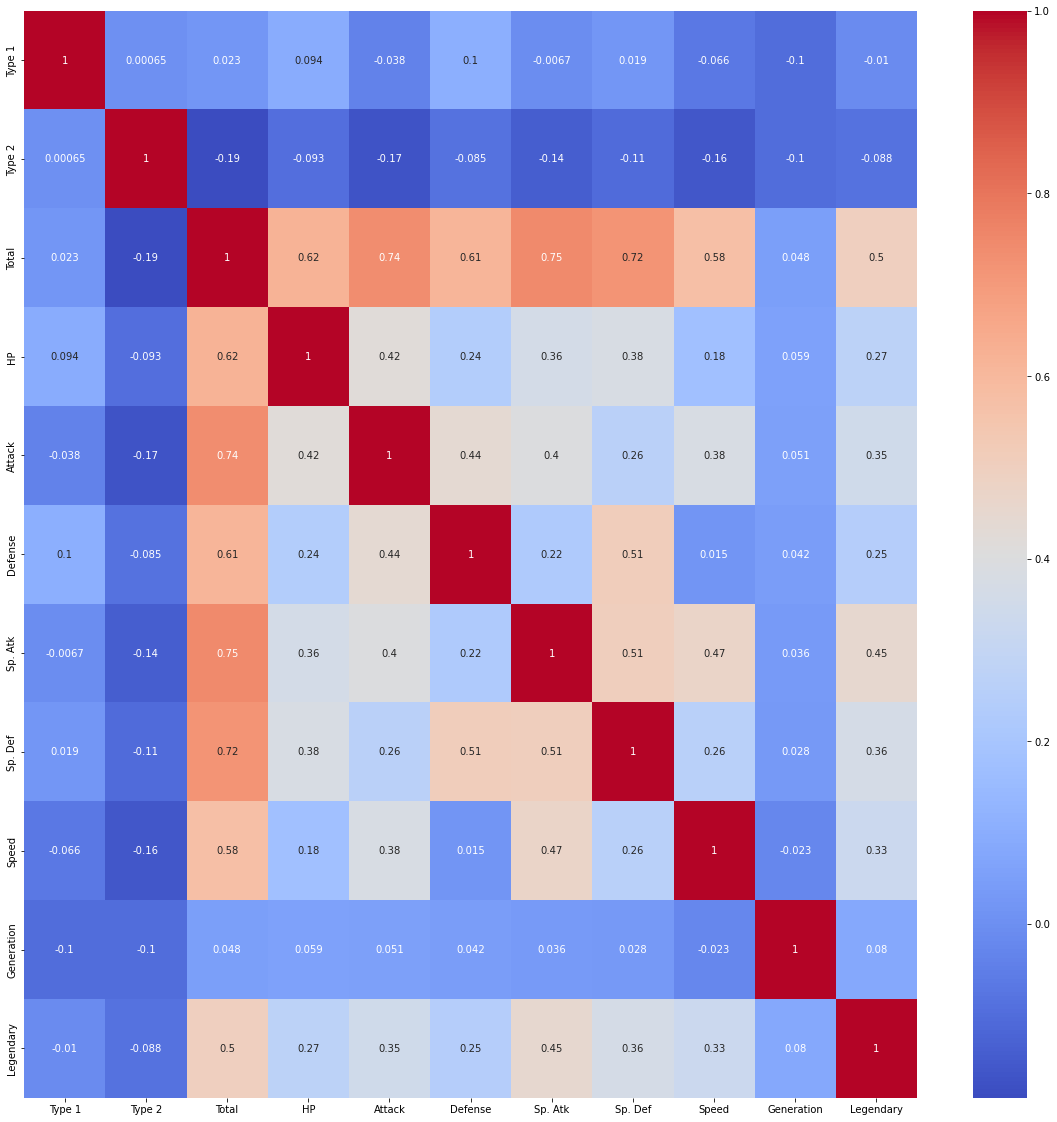

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot = True,cmap = 'coolwarm')

### observam ca avem coloane cu corelatie foarte mica

<Figure size 1440x1440 with 0 Axes>

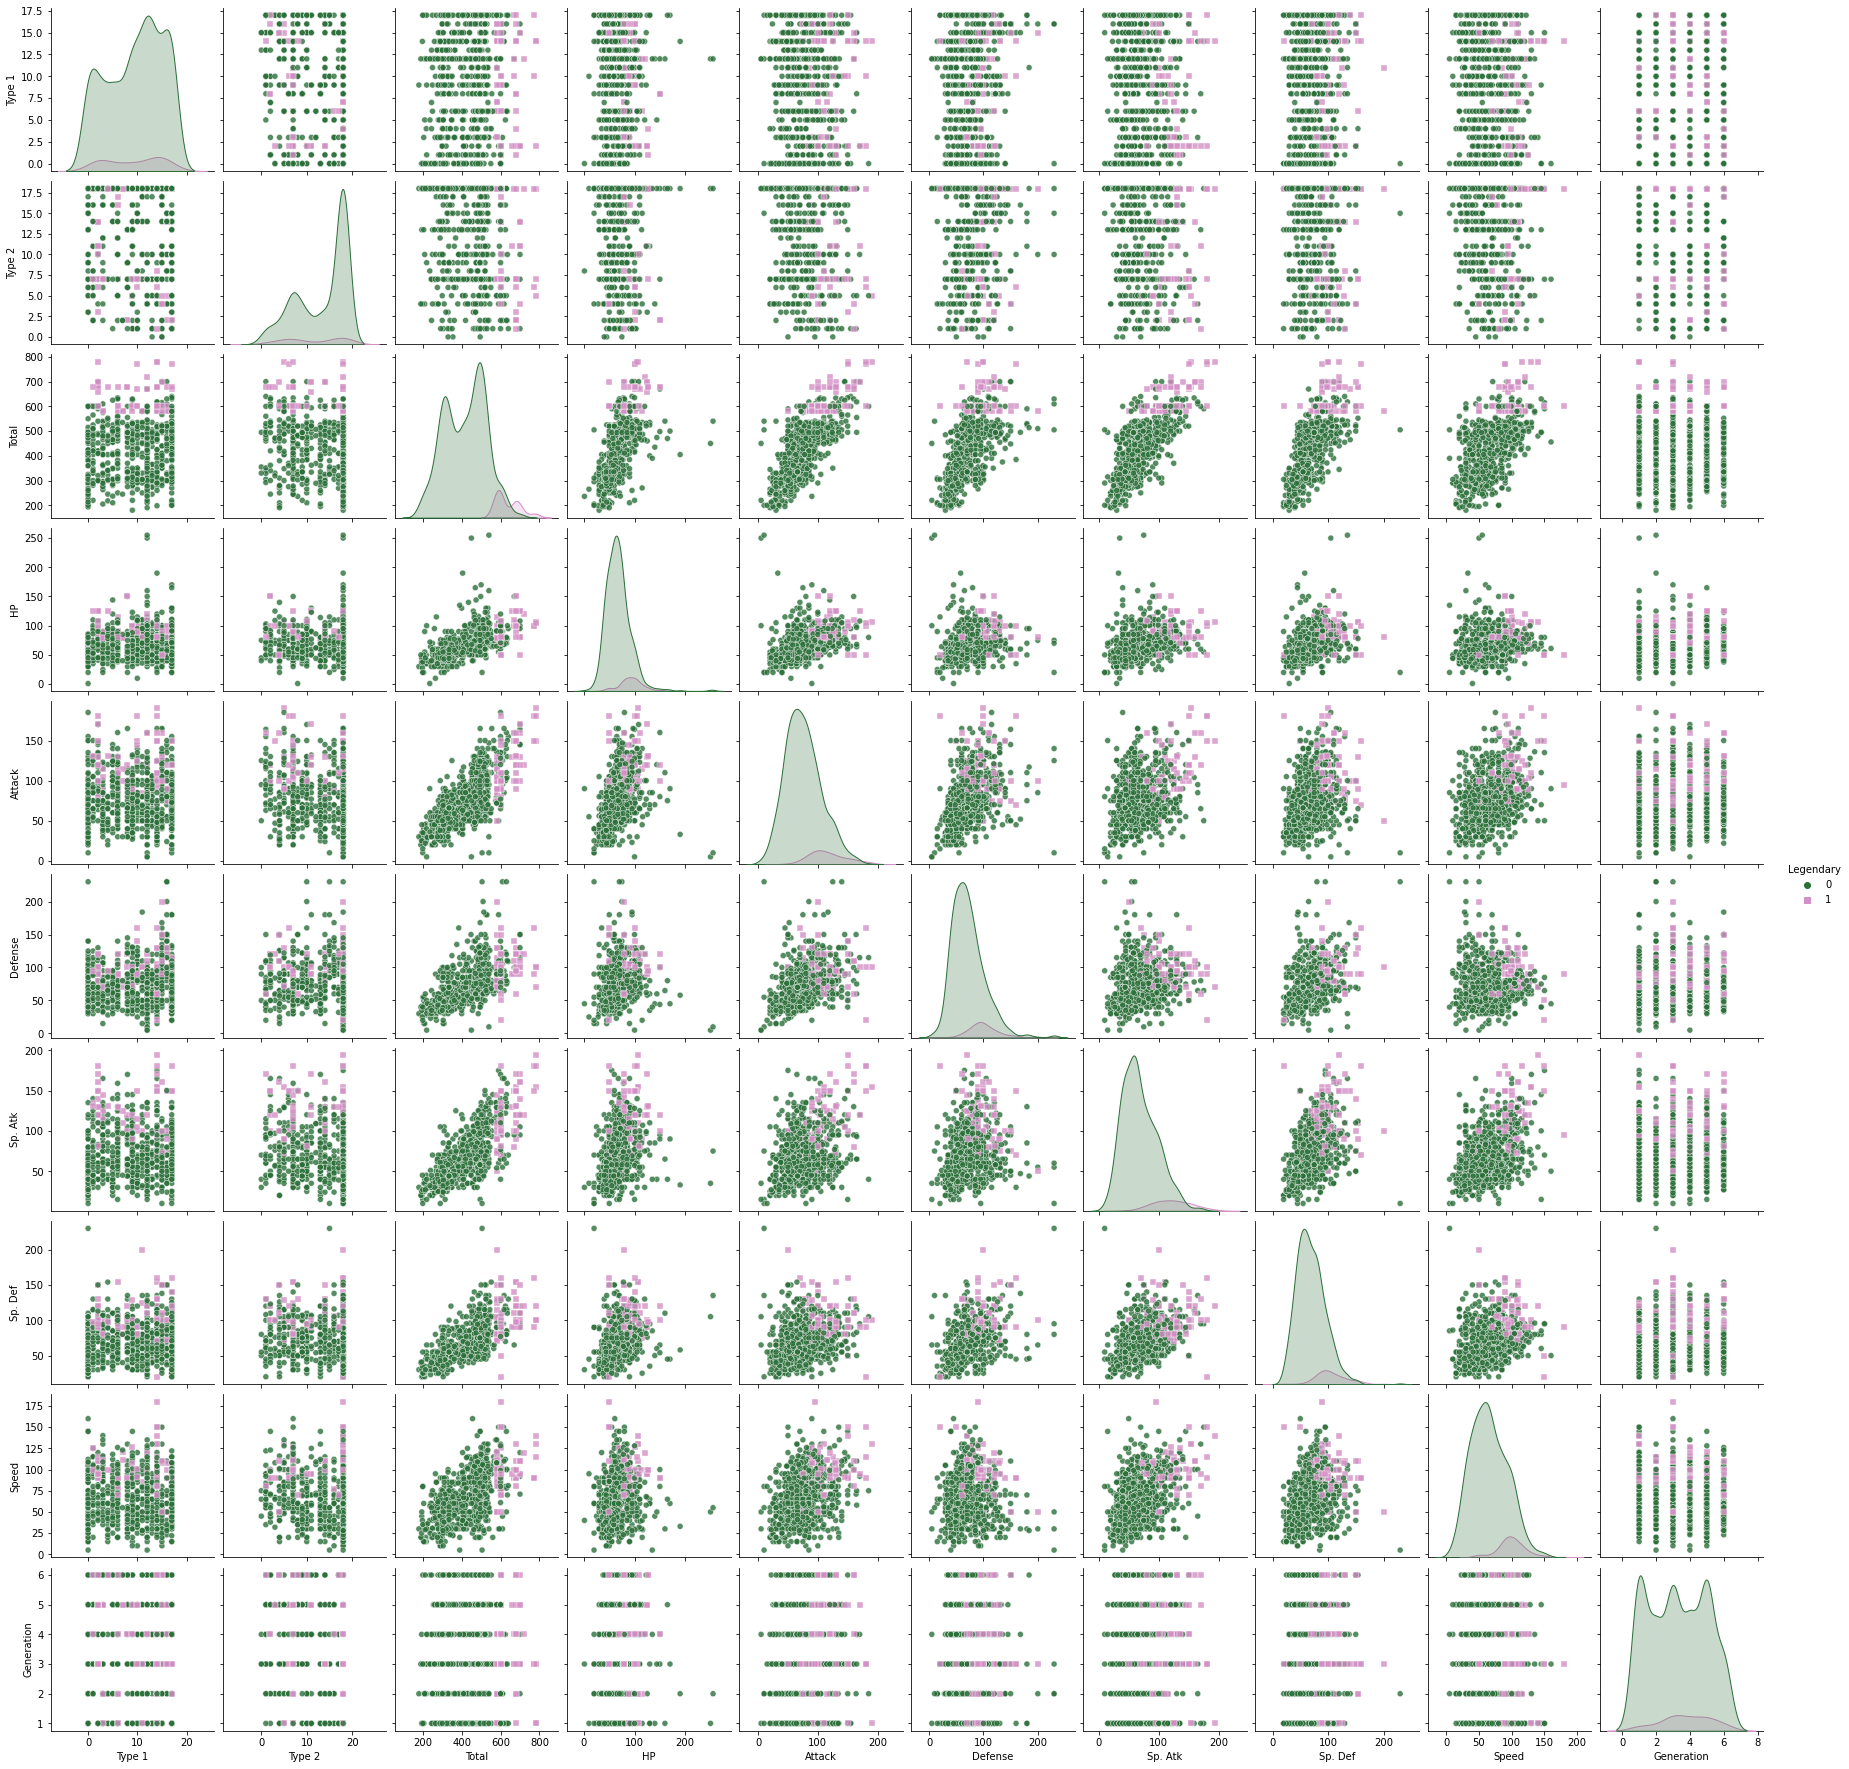

In [13]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data, hue = 'Legendary',markers=["o", "s"], palette="cubehelix",plot_kws=dict(alpha=0.8))
plt.show()

### Observam distributia datelor comparativ cu Target
### facem drop la coloanele cu corelatie mica

In [14]:
data = data.drop(['Generation','Type 1','Type 2'],axis = 1)

<Figure size 1440x1440 with 0 Axes>

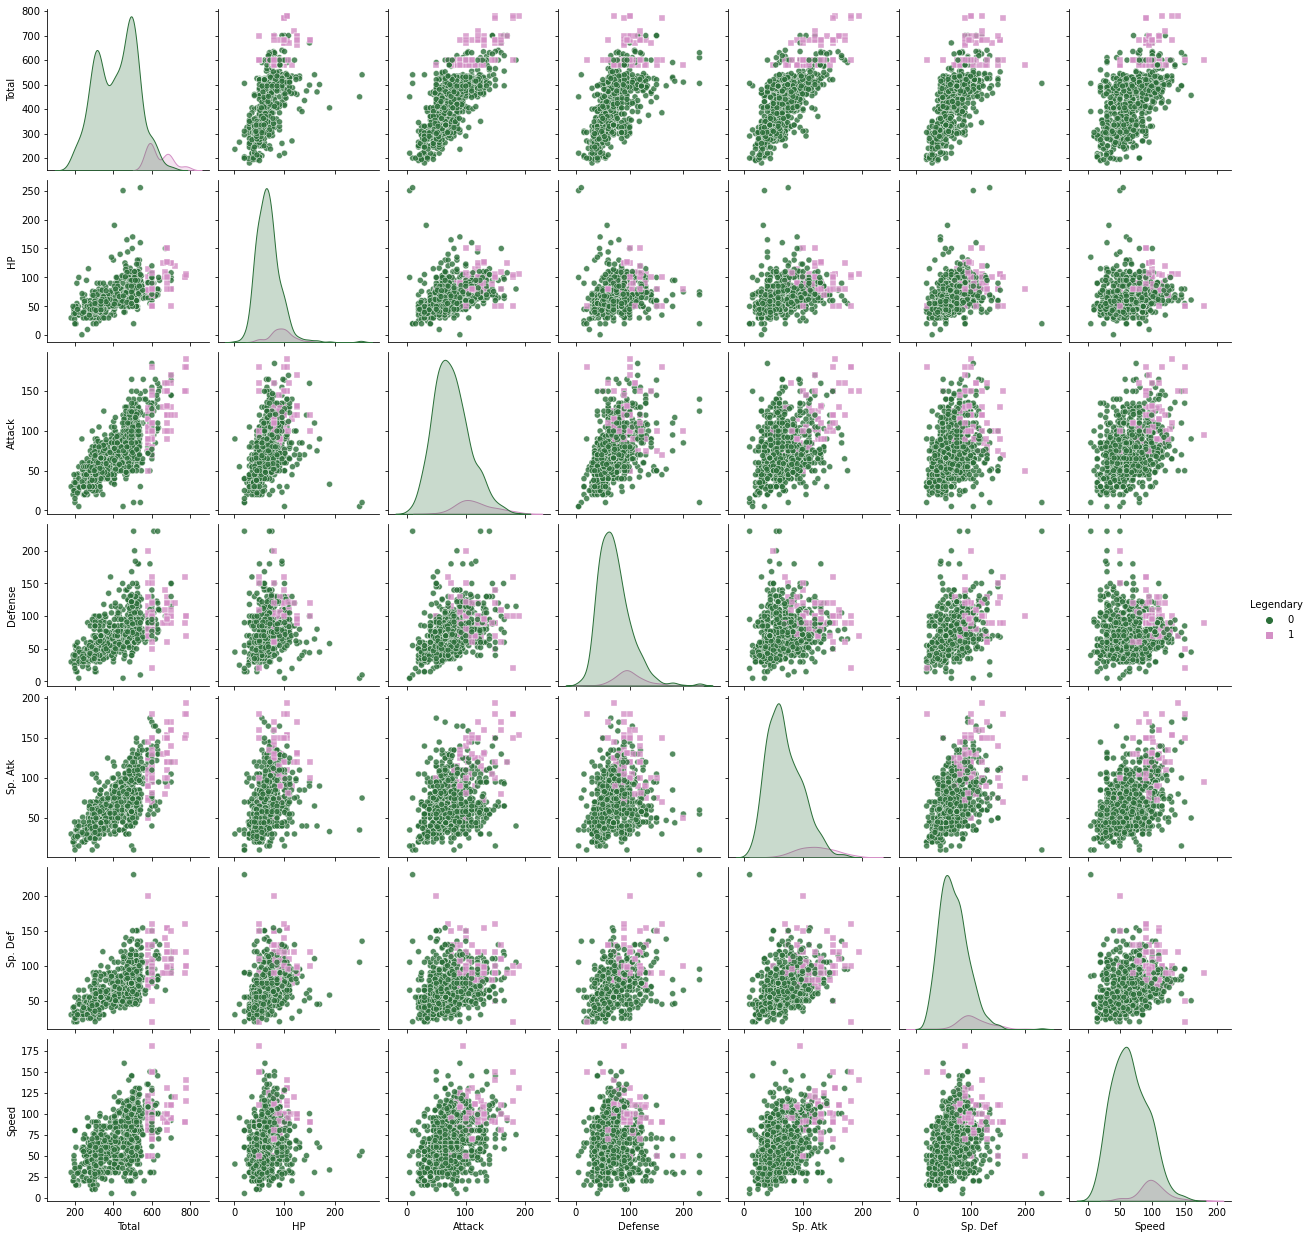

In [15]:
plt.figure(figsize=(20,20))
sns.pairplot(data=data, hue = 'Legendary',markers=["o", "s"], palette="cubehelix",plot_kws=dict(alpha=0.8))
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Total      800 non-null    int64
 1   HP         800 non-null    int64
 2   Attack     800 non-null    int64
 3   Defense    800 non-null    int64
 4   Sp. Atk    800 non-null    int64
 5   Sp. Def    800 non-null    int64
 6   Speed      800 non-null    int64
 7   Legendary  800 non-null    int64
dtypes: int64(8)
memory usage: 88.5 KB


### Analizam simpla distributie a datelor in fiecare coloana

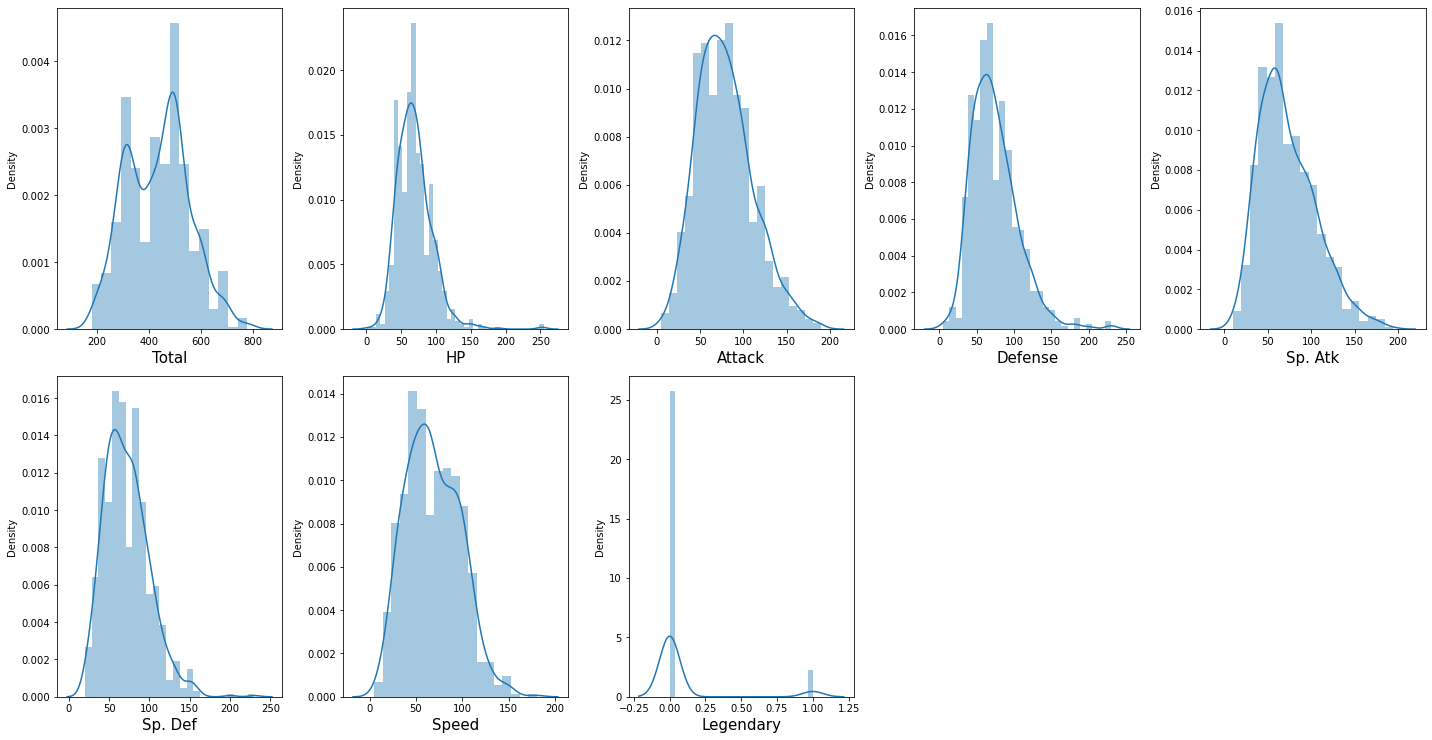

In [17]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in data:
    if plotnumber <= 10:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X = data.drop('Legendary',axis =1)
y = data.loc[:,'Legendary']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

## Random Forest Date initiale

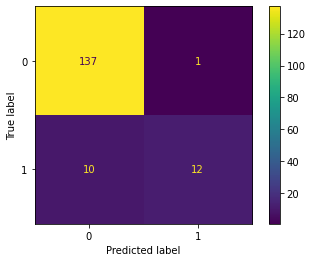

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
rf=RandomForestClassifier(class_weight='balanced',n_estimators=40)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)

report_list = []
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)

### Observam o inegalitate intre clase, ceea ce ne creste acuratetea,insa nu si corectitudinea modelului,incercam si alte modele

In [20]:
print("\n"+ classification_report(y_test, y_pred_rf))
report_list.append(f1_score(y_test, y_pred_rf, average=None))



              precision    recall  f1-score   support

           0       0.93      0.99      0.96       138
           1       0.92      0.55      0.69        22

    accuracy                           0.93       160
   macro avg       0.93      0.77      0.82       160
weighted avg       0.93      0.93      0.92       160



## Logistic Regression date initiale

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)
report_list.append(f1_score(y_test, y_pred_lr, average=None))
print("\n"+ classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95       138
           1       0.65      1.00      0.79        22

    accuracy                           0.93       160
   macro avg       0.82      0.96      0.87       160
weighted avg       0.95      0.93      0.93       160



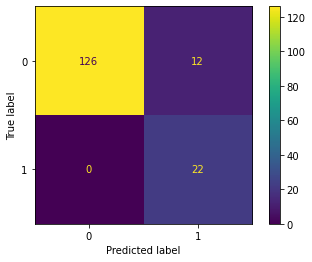

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)

## Gaussian NB date initiale

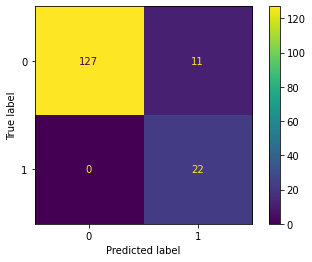

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gnb)

In [24]:
report_list.append(f1_score(y_test, y_pred_gnb,average=None))
print("\n"+ classification_report(y_test, y_pred_gnb))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96       138
           1       0.67      1.00      0.80        22

    accuracy                           0.93       160
   macro avg       0.83      0.96      0.88       160
weighted avg       0.95      0.93      0.94       160



## KNN date initiale

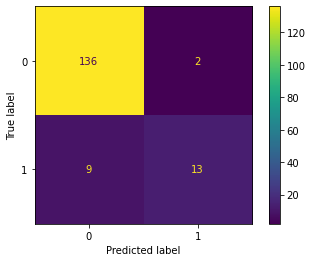

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knb = KNeighborsClassifier()
knb.fit(X_train,y_train)
y_pred_knb = knb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knb)

In [26]:
report_list.append(f1_score(y_test, y_pred_knb,average=None))
print("\n"+ classification_report(y_test, y_pred_knb))


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       138
           1       0.87      0.59      0.70        22

    accuracy                           0.93       160
   macro avg       0.90      0.79      0.83       160
weighted avg       0.93      0.93      0.93       160



### Observam ca clasele nu sunt balansate,deoarece majoritatea cazurilor sunt true negative
### standartizam datele pentru a utiliza ulterior PCA

In [27]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
X_rescaled = min_max_scaler.fit_transform(X)  

print ("\nAfter min max Scaling : \n", X_rescaled)


After min max Scaling : 
 [[0.23       0.17322835 0.23783784 ... 0.29891304 0.21428571 0.22857143]
 [0.375      0.23228346 0.30810811 ... 0.38043478 0.28571429 0.31428571]
 [0.575      0.31102362 0.41621622 ... 0.48913043 0.38095238 0.42857143]
 ...
 [0.7        0.31102362 0.56756757 ... 0.76086957 0.52380952 0.37142857]
 [0.83333333 0.31102362 0.83783784 ... 0.86956522 0.52380952 0.42857143]
 [0.7        0.31102362 0.56756757 ... 0.65217391 0.33333333 0.37142857]]


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(X_rescaled)
reduced = pca.transform(X_rescaled)

In [29]:
reduced.shape

(800, 5)

In [30]:
principal_data = pd.DataFrame(data = reduced
             , columns = ['pc1', 'pc2','pc3','pc4','pc5'])

In [31]:
reduced_data = pd.concat([principal_data,y], axis = 1)
X_train_pca, X_test_pca,y_train_pca,y_test_pca = train_test_split(principal_data,y)

<AxesSubplot:>

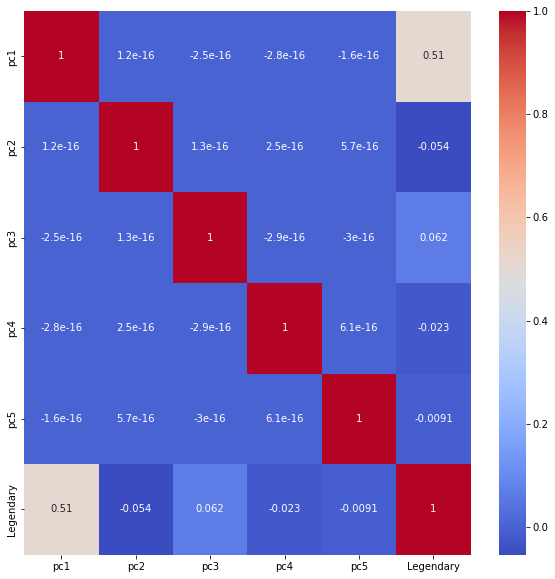

In [32]:
plt.figure(figsize = (10,10))
sns.heatmap(reduced_data.corr(),annot=True,cmap = 'coolwarm')

## Random Forest dupa PCA

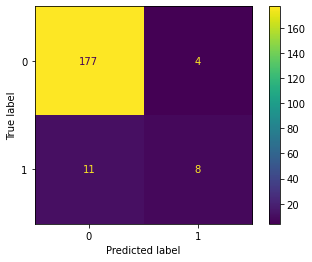

In [33]:
rf.fit(X_train_pca,y_train_pca)

y_pred_rf_pca=rf.predict(X_test_pca)


ConfusionMatrixDisplay.from_predictions(y_test_pca,y_pred_rf_pca)

In [34]:
report_list.append(f1_score(y_test_pca, y_pred_rf_pca,average=None))
print("\n"+ classification_report(y_test_pca, y_pred_rf_pca))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       181
           1       0.67      0.42      0.52        19

    accuracy                           0.93       200
   macro avg       0.80      0.70      0.74       200
weighted avg       0.92      0.93      0.92       200



## Logistic Regression dupa PCA

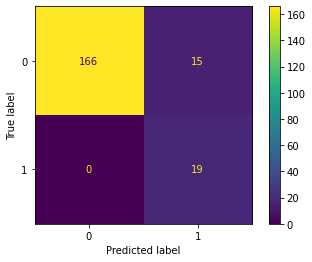

In [35]:
lr.fit(X_train_pca,y_train_pca)
y_pred_lr_pca = lr.predict(X_test_pca)
ConfusionMatrixDisplay.from_predictions(y_test_pca,y_pred_lr_pca)

In [36]:
report_list.append(f1_score(y_test_pca, y_pred_lr_pca,average=None))
print("\n"+ classification_report(y_test_pca, y_pred_lr_pca))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96       181
           1       0.56      1.00      0.72        19

    accuracy                           0.93       200
   macro avg       0.78      0.96      0.84       200
weighted avg       0.96      0.93      0.93       200



### Observam ca sunt multe grseli din cauza lipsei de cazuri cu valoarea 1
###  Si observam ca PCA nu a fost de folos, plus ca avem un dataset relativ mic, si nu este necesitatea de a-l folosi, dar incercarea vina n-are
## Incercam eliminarea anomaliilor

In [37]:
from sklearn.ensemble import IsolationForest
iForest = IsolationForest(n_estimators=20, verbose=2)
iForest.fit(X_train)

Building estimator 1 of 20 for this parallel run (total 20)...
Building estimator 2 of 20 for this parallel run (total 20)...
Building estimator 3 of 20 for this parallel run (total 20)...
Building estimator 4 of 20 for this parallel run (total 20)...
Building estimator 5 of 20 for this parallel run (total 20)...
Building estimator 6 of 20 for this parallel run (total 20)...
Building estimator 7 of 20 for this parallel run (total 20)...
Building estimator 8 of 20 for this parallel run (total 20)...
Building estimator 9 of 20 for this parallel run (total 20)...
Building estimator 10 of 20 for this parallel run (total 20)...
Building estimator 11 of 20 for this parallel run (total 20)...
Building estimator 12 of 20 for this parallel run (total 20)...
Building estimator 13 of 20 for this parallel run (total 20)...
Building estimator 14 of 20 for this parallel run (total 20)...
Building estimator 15 of 20 for this parallel run (total 20)...
Building estimator 16 of 20 for this parallel run

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


IsolationForest(n_estimators=20, verbose=2)

In [38]:
pred = iForest.predict(X_train)
isolation_forest_outliers = np.count_nonzero(pred == -1)/np.count_nonzero(pred != 5)
# trebuie de facut iloc la valorile din X, nu din train, pentru a putea egala testul
X_train_iforest, y_train_iforest = X_train.iloc[(pred != -1), :], y_train[(pred != -1)]

In [39]:
X_test.shape

(160, 7)

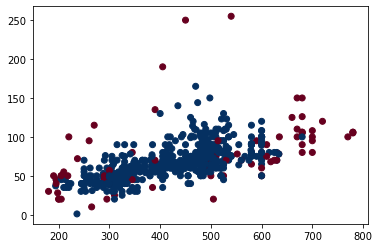

In [40]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=pred, cmap='RdBu')

### Exista o probabilitate ca anume datele anormale sa fie cazurile cu Target=1 ,deoarece pokemonii legendari sunt mai puternici decat marea majoritate,asta insemnand caracteristici diferite de cele medii

In [41]:
isolation_forest_outliers

0.1234375

## LR cu iforest

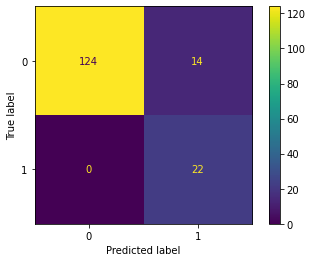

In [42]:
lr.fit(X_train_iforest, y_train_iforest)
y_pred_lr_is = lr.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr_is)

### Insa observam ca anume cazurile true negative s-au micsorat, ceea ce inseamna o antrenare mai buna, si putem observa dupa datele de mai jos din report prin cresterea scorului f1,anume pentru caul '1'

In [43]:
report_list.append(f1_score(y_test, y_pred_lr_is,average=None))
print("\n"+ classification_report(y_test, y_pred_lr_is))


              precision    recall  f1-score   support

           0       1.00      0.90      0.95       138
           1       0.61      1.00      0.76        22

    accuracy                           0.91       160
   macro avg       0.81      0.95      0.85       160
weighted avg       0.95      0.91      0.92       160



## RF cu iforest

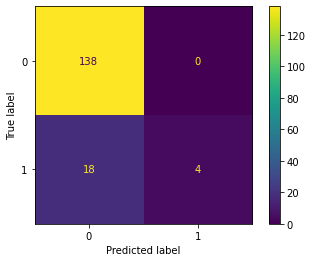

In [44]:
rf.fit(X_train_iforest, y_train_iforest)
y_pred_rf_is = rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf_is)

### Insa putem observa ca RF nu se descurca asa bine dupa eliminarea anomaliilor

In [45]:
report_list.append(f1_score(y_test, y_pred_rf_is,average=None))
print("\n"+ classification_report(y_test, y_pred_rf_is))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94       138
           1       1.00      0.18      0.31        22

    accuracy                           0.89       160
   macro avg       0.94      0.59      0.62       160
weighted avg       0.90      0.89      0.85       160



## GNB cu iforest

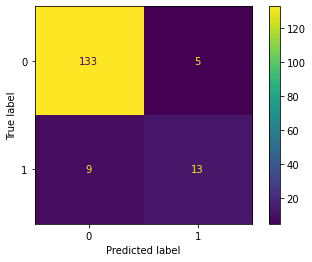

In [46]:
gnb.fit(X_train_iforest,y_train_iforest)
y_pred_gnb_is=gnb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gnb_is)

#### Panacand LR se descurca cel mai bine cu iforest

In [47]:
report_list.append(f1_score(y_test, y_pred_gnb_is,average=None))
print("\n"+ classification_report(y_test, y_pred_gnb_is))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       138
           1       0.72      0.59      0.65        22

    accuracy                           0.91       160
   macro avg       0.83      0.78      0.80       160
weighted avg       0.91      0.91      0.91       160



### KNN cu iforest

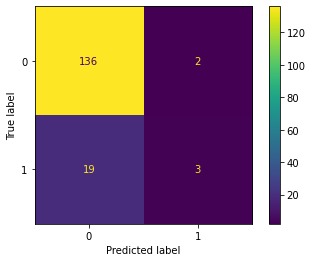

In [48]:
knb.fit(X_train_iforest,y_train_iforest)
y_pred_knb_is = knb.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knb_is)

In [49]:
report_list.append(f1_score(y_test, y_pred_knb_is,average=None))
print("\n"+ classification_report(y_test, y_pred_knb_is))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       138
           1       0.60      0.14      0.22        22

    accuracy                           0.87       160
   macro avg       0.74      0.56      0.58       160
weighted avg       0.84      0.87      0.83       160



### Observam ca panacand KNN se descurca cel mai rau, insa problema principala ramane diferenta intre clase

# Balansam clasele

In [50]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=12)

In [51]:
X_res,y_res=smk.fit_resample(X_train, y_train)

In [52]:
X_train_res,X_test_res,y_train_res,y_test_res=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [53]:
X_train_res.shape,y_train_res.shape

((955, 7), (955,))

## LR cu dataset balansat

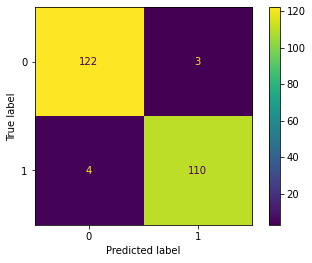

In [54]:
lr.fit(X_train_res, y_train_res)
y_pred_lr_res = lr.predict(X_test_res)
ConfusionMatrixDisplay.from_predictions(y_test_res,y_pred_lr_res)

### Observam rezultate cu mult mai bune, chiar si f1_score fiind la un nivel inalt

In [55]:
report_list.append(f1_score(y_test_res, y_pred_lr_res,average=None))
print("\n"+ classification_report(y_test_res, y_pred_lr_res))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       125
           1       0.97      0.96      0.97       114

    accuracy                           0.97       239
   macro avg       0.97      0.97      0.97       239
weighted avg       0.97      0.97      0.97       239



## RF balansat

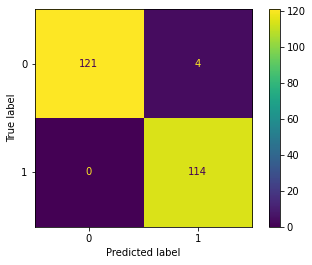

In [56]:
rf.fit(X_train_res,y_train_res)
y_pred_rf_res = rf.predict(X_test_res)
ConfusionMatrixDisplay.from_predictions(y_test_res,y_pred_rf_res)

In [57]:
report_list.append(f1_score(y_test_res, y_pred_rf_res,average=None))
print("\n"+ classification_report(y_test_res, y_pred_rf_res))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       125
           1       0.97      1.00      0.98       114

    accuracy                           0.98       239
   macro avg       0.98      0.98      0.98       239
weighted avg       0.98      0.98      0.98       239



## GNB balansat

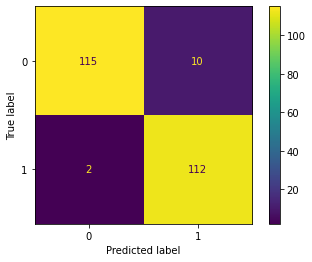

In [58]:
gnb.fit(X_train_res,y_train_res)
y_pred_gnb_res=gnb.predict(X_test_res)
ConfusionMatrixDisplay.from_predictions(y_test_res,y_pred_gnb_res)

In [59]:
report_list.append(f1_score(y_test_res, y_pred_gnb_res,average=None))
print("\n"+ classification_report(y_test_res, y_pred_gnb_res))


              precision    recall  f1-score   support

           0       0.98      0.92      0.95       125
           1       0.92      0.98      0.95       114

    accuracy                           0.95       239
   macro avg       0.95      0.95      0.95       239
weighted avg       0.95      0.95      0.95       239



## KNN balansat

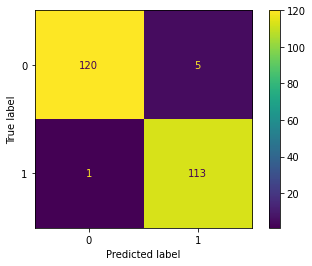

In [60]:
knb.fit(X_train_res,y_train_res)
y_pred_knb_res = knb.predict(X_test_res)
ConfusionMatrixDisplay.from_predictions(y_test_res,y_pred_knb_res)

In [61]:
report_list.append(f1_score(y_test_res, y_pred_knb_res,average=None))
print("\n"+ classification_report(y_test_res, y_pred_knb_res))


              precision    recall  f1-score   support

           0       0.99      0.96      0.98       125
           1       0.96      0.99      0.97       114

    accuracy                           0.97       239
   macro avg       0.97      0.98      0.97       239
weighted avg       0.98      0.97      0.97       239



# Feature Selection

In [62]:
#pip install kydavra

In [63]:
from kydavra import PearsonCorrelationSelector
pearson = PearsonCorrelationSelector(min_corr = 0.4,max_corr = 1)
selected_columns = pearson.select(data,'Legendary')

In [64]:
selected_columns

['Total', 'Sp. Atk']

In [65]:
X = data.loc[:,selected_columns]
y = data.loc[:,'Legendary']

In [66]:
X_train_ft,X_test_ft,y_train_ft,y_test_ft = train_test_split(X,y,test_size = 0.2)

### LR Pearson correlation selector

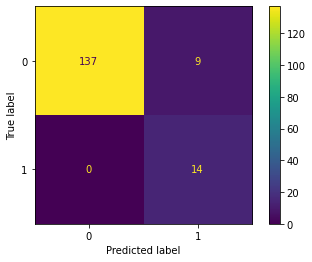

In [67]:
lr.fit(X_train_ft,y_train_ft)
y_pred_selection = lr.predict(X_test_ft)
ConfusionMatrixDisplay.from_predictions(y_test_ft,y_pred_selection)

In [68]:
report_list.append(f1_score(y_test_ft, y_pred_selection,average=None))
print("\n"+ classification_report(y_test_ft, y_pred_selection))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97       146
           1       0.61      1.00      0.76        14

    accuracy                           0.94       160
   macro avg       0.80      0.97      0.86       160
weighted avg       0.97      0.94      0.95       160



### Observam un rezultat mediu,chiar daca am selectat cele mai importante coloane, ramane problema datasetului unbalansat

In [69]:
X = data.drop("Legendary",axis = 1)
y = data.loc[:,'Legendary']
X_res,y_res=smk.fit_resample(X, y)
data_reshaped = pd.concat([X_res,y_res], axis = 1)

<AxesSubplot:>

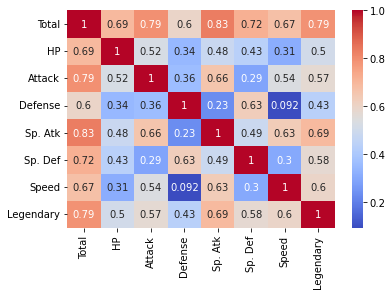

In [70]:
sns.heatmap(data_reshaped.corr(),annot=True,cmap = 'coolwarm')

In [71]:
data_reshaped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Total      1470 non-null   int64
 1   HP         1470 non-null   int64
 2   Attack     1470 non-null   int64
 3   Defense    1470 non-null   int64
 4   Sp. Atk    1470 non-null   int64
 5   Sp. Def    1470 non-null   int64
 6   Speed      1470 non-null   int64
 7   Legendary  1470 non-null   int64
dtypes: int64(8)
memory usage: 92.0 KB


In [72]:
pearson = PearsonCorrelationSelector()
selected_columns = pearson.select(data_reshaped,'Legendary')

In [73]:
selected_columns

['Total', 'HP', 'Attack', 'Sp. Atk', 'Sp. Def', 'Speed']

In [74]:
X = data_reshaped.loc[:,selected_columns]
y = data_reshaped.loc[:,'Legendary']
X_train_ft,X_test_ft,y_train_ft,y_test_ft = train_test_split(X,y,test_size = 0.2)

### LR pe dataset balansat cu Pearson correlation

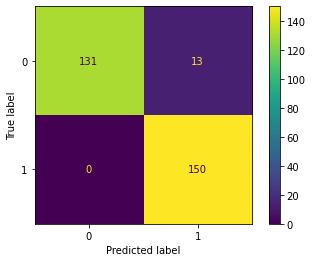

In [75]:
lr.fit(X_train_ft,y_train_ft)
y_pred_selection = lr.predict(X_test_ft)
ConfusionMatrixDisplay.from_predictions(y_test_ft,y_pred_selection)

In [76]:
report_list.append(f1_score(y_test_ft, y_pred_selection,average=None))
print("\n"+ classification_report(y_test_ft, y_pred_selection))


              precision    recall  f1-score   support

           0       1.00      0.91      0.95       144
           1       0.92      1.00      0.96       150

    accuracy                           0.96       294
   macro avg       0.96      0.95      0.96       294
weighted avg       0.96      0.96      0.96       294



### Vedem ca deja f1 este mai mare pentru 1 ,in general fiind un rezultat bun

## GNB pe dataset balansat cu pearson correlation

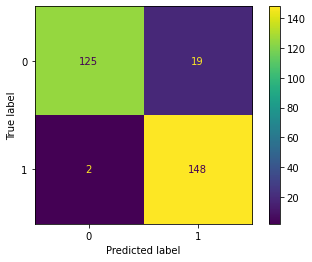

In [77]:
gnb.fit(X_train_ft,y_train_ft)
y_pred_selection_gnb = gnb.predict(X_test_ft)
ConfusionMatrixDisplay.from_predictions(y_test_ft,y_pred_selection_gnb)

In [78]:
report_list.append(f1_score(y_test_ft,y_pred_selection_gnb,average=None))
print("\n"+ classification_report(y_test_ft,y_pred_selection_gnb))


              precision    recall  f1-score   support

           0       0.98      0.87      0.92       144
           1       0.89      0.99      0.93       150

    accuracy                           0.93       294
   macro avg       0.94      0.93      0.93       294
weighted avg       0.93      0.93      0.93       294



In [79]:
from kydavra import PointBiserialCorrSelector
pointbiserial = PointBiserialCorrSelector()
selectedcolumn=pointbiserial.select(data,'Legendary')

In [80]:
from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=5)

In [81]:
selectedcolumn

['Total', 'Sp. Atk']

In [82]:
selectedcolumn_res=pointbiserial.select(data_reshaped,'Legendary')
selectedcolumn_res

['Total', 'Sp. Atk']

### Avem aceleasi coloane ca si in cazul pearson correlation, asa ca nu voi folosi GNB si LR
## Random Forest cu Point biserial correlation

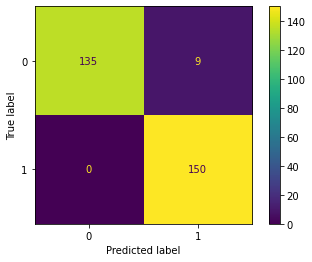

In [83]:
rf.fit(X_train_ft,y_train_ft)
y_pred_selection_rf = rf.predict(X_test_ft)
ConfusionMatrixDisplay.from_predictions(y_test_ft,y_pred_selection_rf)

In [84]:
report_list.append(f1_score(y_test_ft, y_pred_selection_rf,average=None))
print("\n"+ classification_report(y_test_ft, y_pred_selection_rf))


              precision    recall  f1-score   support

           0       1.00      0.94      0.97       144
           1       0.94      1.00      0.97       150

    accuracy                           0.97       294
   macro avg       0.97      0.97      0.97       294
weighted avg       0.97      0.97      0.97       294



### Temporar este cel mai bun rezultat

In [85]:
len(report_list)
#report_list

18

In [86]:
report_list_0 = []
report_list_1 = []
avg_report_list = []
for i in report_list:
    report_list_0.append(i[0])
    report_list_1.append(i[1])
    avg_report_list.append((i[0]+i[1])/2)
    

# Vizualizarea rezultatelor

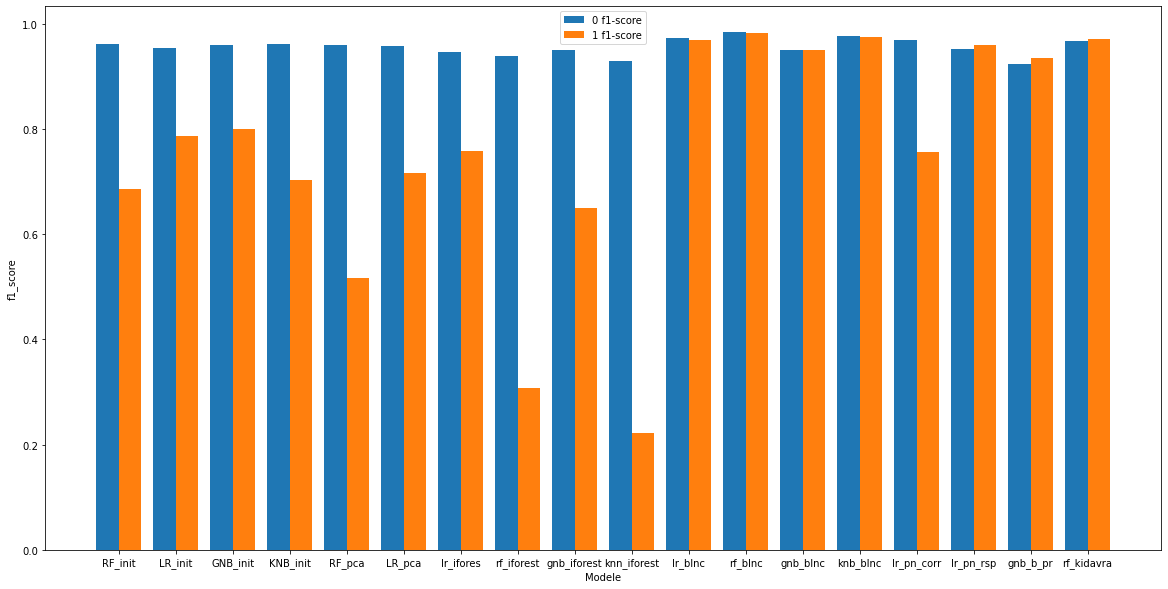

In [87]:
fig = plt.figure(figsize = (20,10))
x = ['RF_init','LR_init','GNB_init','KNB_init','RF_pca','LR_pca','lr_ifores','rf_iforest','gnb_iforest','knn_iforest','lr_blnc','rf_blnc','gnb_blnc','knb_blnc','lr_pn_corr','lr_pn_rsp','gnb_b_pr','rf_kidavra']
y = report_list
 
X_axis = np.arange(len(report_list))
  
plt.bar(X_axis - 0.2, report_list_0, 0.4, label = '0 f1-score')
plt.bar(X_axis + 0.2, report_list_1, 0.4, label = '1 f1-score')
#plt.bar(X_axis + 0.0, avg_report_list, 0.3, label = 'avg f1-score')  
plt.xticks(X_axis, x)
plt.xlabel("Modele")
plt.ylabel("f1_score")
plt.legend()
plt.show()

### Observam un rezultat mai bun in cazurile in care datasetul este balansat

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


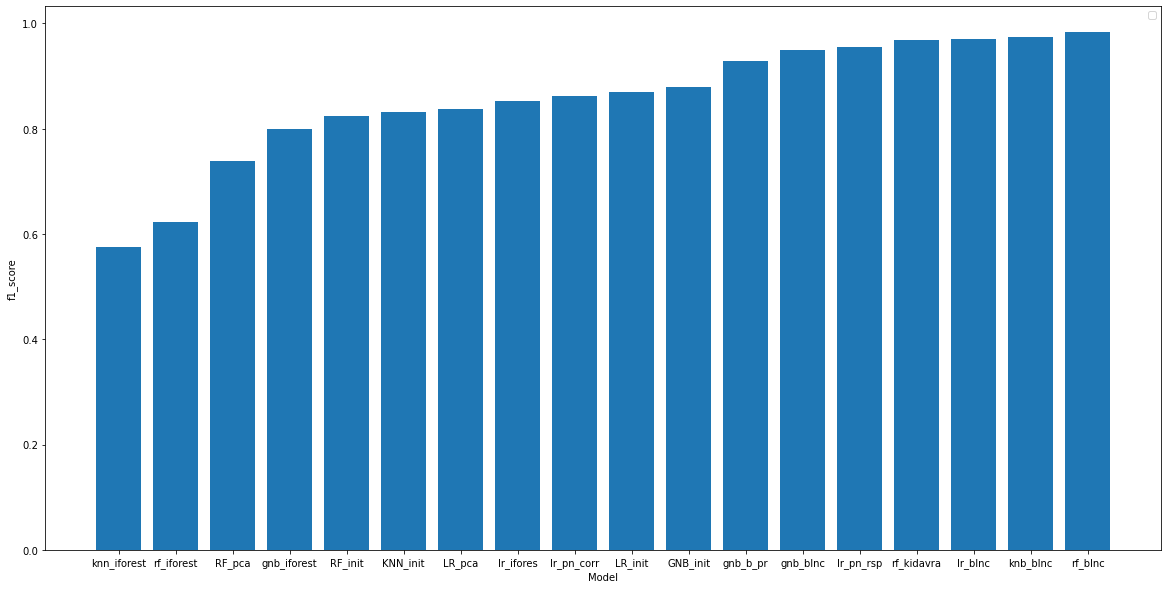

In [88]:
fig = plt.figure(figsize = (20,10))
x = ['RF_init','LR_init','GNB_init','KNN_init','RF_pca','LR_pca','lr_ifores','rf_iforest','gnb_iforest','knn_iforest','lr_blnc','rf_blnc','gnb_blnc','knb_blnc','lr_pn_corr','lr_pn_rsp','gnb_b_pr','rf_kidavra']
y = avg_report_list
 
#X_axis = np.arange(len(report_list))
  
#plt.bar(X_axis - 0.2, report_list, 0.4, label = '0 f1-score')
#plt.bar(X_axis + 0.2, report_list_1, 0.4, label = '1 f1-score')
#plt.bar(X_axis + 0.0, avg_report_list, 0.3, label = 'avg f1-score') 
df = pd.DataFrame({"Model":x,
                  "f1_score":y})
df_sorted= df.sort_values('f1_score')
plt.bar('Model', 'f1_score',data=df_sorted)
plt.xlabel("Model")
plt.ylabel("f1_score")
plt.legend()
plt.show()

## In concluzie pot spune ca cele mai bune rezultate le au modelele balansate, iar apoi cele unde am realizat feature selection, deoarece in cazul in care sunt mai multe coloane, datele comune pentru prezicere pot fi mai mici. Pe acest dataset ambele metode de selectie au returnat aceleasi coloane , trebuie de incercat pe alt dataset de a vedea mai bine diferenta dintre ele